In [1]:
import pint
si = pint.UnitRegistry()

In [2]:
from scipy.stats import lognorm

In [3]:
%run parcel.ipynb

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
si.setup_matplotlib()

In [6]:
rd = exp(np.linspace(
    log(10.85), 
    log(503),
    3
))[::-1] * si.nanometre
rd = rd[::-1]


print(rd.shape)
print(rd)

(3,)
[ 10.85        73.87523266 503.        ] nanometer


In [7]:
rm = 50 * si.nanometre
sg = 1.4

nd = lognorm.pdf(rd, log(sg), 0, rm)
nd *= 1000 / np.sum(nd) / si.milligram

dr = rd[1:] - rd[0:-1]
dn_dr = nd[0:-1] / dr

C:\Users\Michael\Anaconda3\lib\site-packages\pint\quantity.py:1377: UnitStrippedWarning:

The unit of the quantity is stripped.



<IPython.core.display.Javascript object>


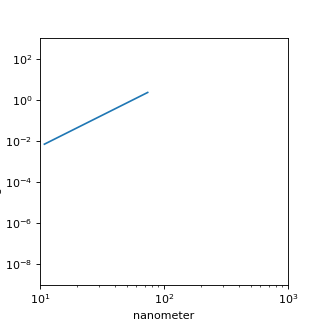

([<matplotlib.axis.YTick at 0x205d37df9e8>,
 <a list of 6 Text yticklabel objects>)

In [8]:
plt.figure(figsize=(4,4))
plt.plot(rd[0:-1], dn_dr)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1, 1e3)
plt.ylim(1e-9, 1e3)
plt.yticks(10.**np.arange(-8, 3, step=2))  

In [9]:
integ, sys = parcel(
    si = si,
    t = 40 * si.seconds,
    T0 = 300 * si.kelvin,
    q0 = 21 * si.grams / si.kilogram,
    p0 = 1000 * si.hectopascals,
    w = lambda t: 10* si.metre / si.second,
    nd = nd, 
    rd = rd, 
    kp = 1.28,
    dt_max = 0.05 * si.second
)

In [10]:
ix = sys.ix
fn = sys.fn
ph = sys.ph

In [11]:
T = integ.y[ix.T] * ix.T_unit
p = integ.y[ix.p] * ix.p_unit
q = integ.y[ix.q] * ix.q_unit
r = fn.r(integ.y[ix.x] * ix.x_unit)
t = integ.t * ix.t_unit

dr_dt = np.empty_like(r) * ix.r_unit / ix.t_unit
for i, tau in enumerate(integ.t):
    y = integ.y[:, i]
    dx_dt = sys(tau, y)[ix.x] * ix.x_unit / ix.t_unit
    x = y[ix.x] * ix.x_unit
    dr_dt.magnitude[:, i] = dx_dt / fn.dx_dr(fn.r(x))



100 x 1um  VS 50 x 0.95 um + 50 x 1.05 um,   porównać przesycenia

<IPython.core.display.Javascript object>


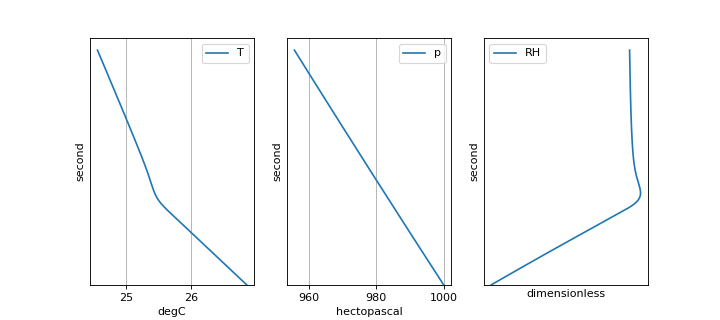

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9,4))

plt.xticks([])
plt.yticks([])
ax1.set_ylim([0, 42])

ax1.plot(T, t, label="T")
ax1.grid()
ax1.legend()
ax1.xaxis.set_units(si.celsius)

ax2.plot(p, t, label="p")
ax2.grid()
ax2.legend()
ax2.xaxis.set_units(si.hectopascals)

ax3.plot(ph.RH(T, p, q), t, label="RH")
ax3.grid()
ax3.legend()

### Nazwa notebooka lekko oszukana, bo  $A,B \neq 0 $

<IPython.core.display.Javascript object>


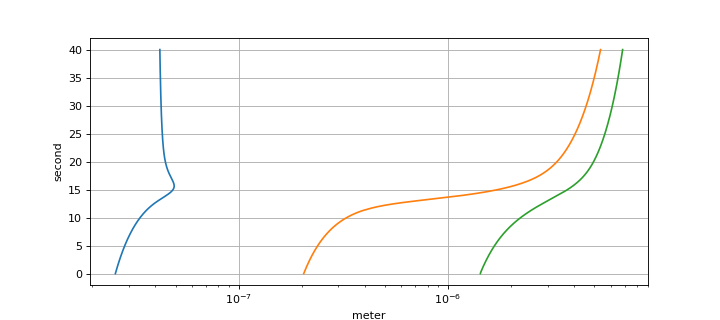

In [13]:
plt.figure(figsize=(9,4))
for i in range(ix.x.stop - ix.x.start):
    plt.plot(r[i], t, label="r_"+str(i))

plt.xscale('log')
# plt.yscale('log')
plt.grid()
# plt.legend()

plt.show()

<IPython.core.display.Javascript object>


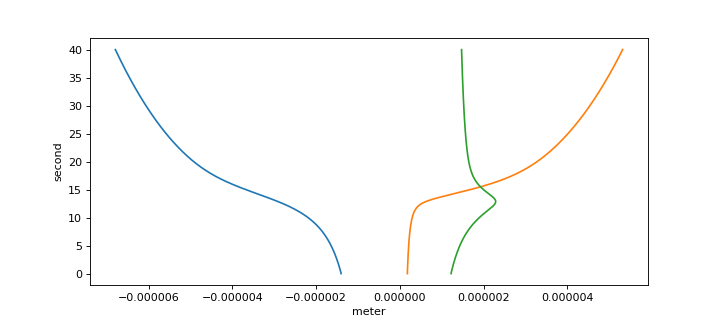

In [13]:
plt.figure(figsize=(9,4))
for i in range(0,ix.x.stop - ix.x.start):
    plt.plot(r[i]-r[i-1], t, label="r_"+str(i))
# plt.xscale('log')
# plt.yscale('log')
plt.show()

<IPython.core.display.Javascript object>


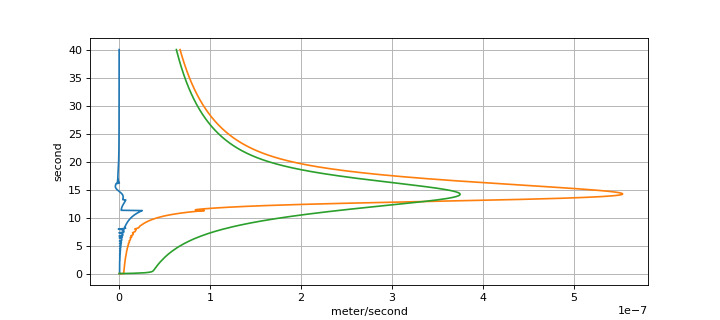

In [14]:
plt.figure(figsize=(9,4))
for i in range(ix.x.stop - ix.x.start):
    plt.plot(dr_dt[i], t, label="r_"+str(i))

# plt.xscale('log')
# plt.yscale('log')
plt.grid()
# plt.legend()

plt.show()

<IPython.core.display.Javascript object>


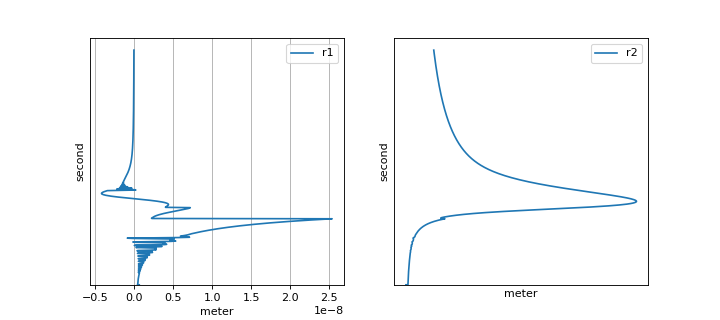

Traceback (most recent call last):
  File "C:\Users\Michael\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\Michael\Anaconda3\lib\site-packages\matplotlib\lines.py", line 635, in recache_always
    self.recache(always=True)
  File "C:\Users\Michael\Anaconda3\lib\site-packages\matplotlib\lines.py", line 639, in recache
    xconv = self.convert_xunits(self._xorig)
  File "C:\Users\Michael\Anaconda3\lib\site-packages\matplotlib\artist.py", line 186, in convert_xunits
    return ax.xaxis.convert_units(x)
  File "C:\Users\Michael\Anaconda3\lib\site-packages\matplotlib\axis.py", line 1530, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "C:\Users\Michael\Anaconda3\lib\site-packages\pint\matplotlib.py", line 35, in convert
    return self._convert_value(value, unit, axis)
  File "C:\Users\Michael\Anaconda3\lib\site-packages\pint\matplotlib.py", line 40, in _convert_value
    return value.t

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,4))

plt.xticks([])
plt.yticks([])
ax1.set_ylim([0, 42])

ax1.plot(dr_dt[0], t, label="r1")
ax1.grid()
ax1.legend()
ax1.xaxis.set_units(si.metre)

ax2.plot(dr_dt[1], t, label="r2")
ax2.grid()
ax2.legend()
ax2.xaxis.set_units(si.metre)